## Placement Prediction

### 1. Data Preparation: Cleaning, Preprocessing & Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Dataset is sourced from https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data?select=placementdata.csv

In [2]:
data = "https://raw.githubusercontent.com/bankymondial/Placement-Prediction/refs/heads/main/placementdata.csv"

In [3]:
df = pd.read_csv(data)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None


In [5]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [6]:
print(df.describe())

         StudentID          CGPA   Internships      Projects  \
count  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000      7.698010      1.049200      2.026600   
std     2886.89568      0.640131      0.665901      0.867968   
min        1.00000      6.500000      0.000000      0.000000   
25%     2500.75000      7.400000      1.000000      1.000000   
50%     5000.50000      7.700000      1.000000      2.000000   
75%     7500.25000      8.200000      1.000000      3.000000   
max    10000.00000      9.100000      2.000000      3.000000   

       Workshops/Certifications  AptitudeTestScore  SoftSkillsRating  \
count              10000.000000       10000.000000      10000.000000   
mean                   1.013200          79.449900          4.323960   
std                    0.904272           8.159997          0.411622   
min                    0.000000          60.000000          3.000000   
25%                    0.000000          73.000000          4.0

#### This code changes modifies the column names, removing `/` and  changing all column names to lowercase.

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '')

In [8]:
df.tail()

,studentid,cgpa,internships,projects,workshopscertifications,aptitudetestscore,softskillsrating,extracurricularactivities,placementtraining,ssc_marks,hsc_marks,placementstatus
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


#### Data Preprocessing
- Check for missing data
- Encoding categorical features
- Defining features (X) and target (y)

In [9]:
df.isna().sum()

studentid                    0
cgpa                         0
internships                  0
projects                     0
workshopscertifications      0
aptitudetestscore            0
softskillsrating             0
extracurricularactivities    0
placementtraining            0
ssc_marks                    0
hsc_marks                    0
placementstatus              0
dtype: int64

In [10]:
print(df['extracurricularactivities'].unique())
print(df['placementtraining'].unique())
print(df['placementstatus'].unique())

['No' 'Yes']
['No' 'Yes']
['NotPlaced' 'Placed']


In [11]:
df['placementstatus'] = df['placementstatus'].map({'NotPlaced': 0, 'Placed': 1})

In [12]:
print(df.dtypes)

studentid                      int64
cgpa                         float64
internships                    int64
projects                       int64
workshopscertifications        int64
aptitudetestscore              int64
softskillsrating             float64
extracurricularactivities     object
placementtraining             object
ssc_marks                      int64
hsc_marks                      int64
placementstatus                int64
dtype: object


In [13]:
df.tail()

,studentid,cgpa,internships,projects,workshopscertifications,aptitudetestscore,softskillsrating,extracurricularactivities,placementtraining,ssc_marks,hsc_marks,placementstatus
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,0
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,1
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,1
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,1
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,0


### 2.  Train-Validation-Test Split (60-20-20)
- Define X (features) and y (target variable)
- Split the data into train (60%) and temp (40%) for validation and test
- Split the temp data into validation (50% of 40%) and test (50% of 40%)

In [14]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train['placementstatus'].values
y_val = df_val['placementstatus'].values
y_test = df_test['placementstatus'].values

In [17]:
del df_train['placementstatus']
del df_val['placementstatus']
del df_test['placementstatus']

### 4. Training Logistic Regression Model (Baseline Model)

In [18]:
categorical = ['extracurricularactivities', 'placementtraining']
numerical = ['cgpa', 'aptitudetestscore', 'ssc_marks', 'hsc_marks', 
             'internships', 'projects', 'workshopscertifications', 'softskillsrating']

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [20]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

### 5. Prepare Validation dataset and make predictions

In [21]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred = (y_pred_proba >= 0.5)

accuracy = (y_val == y_pred).mean()
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Validation Accuracy: 0.7870
Recall: 0.7590
F1 Score: 0.7538
ROC AUC: 0.8716


### Interpretation
- Validation Accuracy (0.7870): The model correctly predicts placement outcomes ~78.7% of the time.
- Recall (0.7590): It correctly identifies ~75.9% of students who actually got placed. A higher recall means fewer false negatives (i.e., fewer placed students misclassified as not placed).
- F1 Score (0.7538): A balance between precision and recall. Since it’s close to recall, your model might be favoring catching more placed students over reducing false positives.
- ROC AUC (0.8716): The model is good at distinguishing between placed and non-placed students.

### 6. Feature Importance Using Logistic Regression Coefficients:
- Extract feature names from DictVectorizer
- Ensure the number of features matches the number of coefficients
- Create a DataFrame with feature names and coefficients
- Calculate the absolute value of coefficients for ranking
- Plot feature importance
- Display sorted feature importance

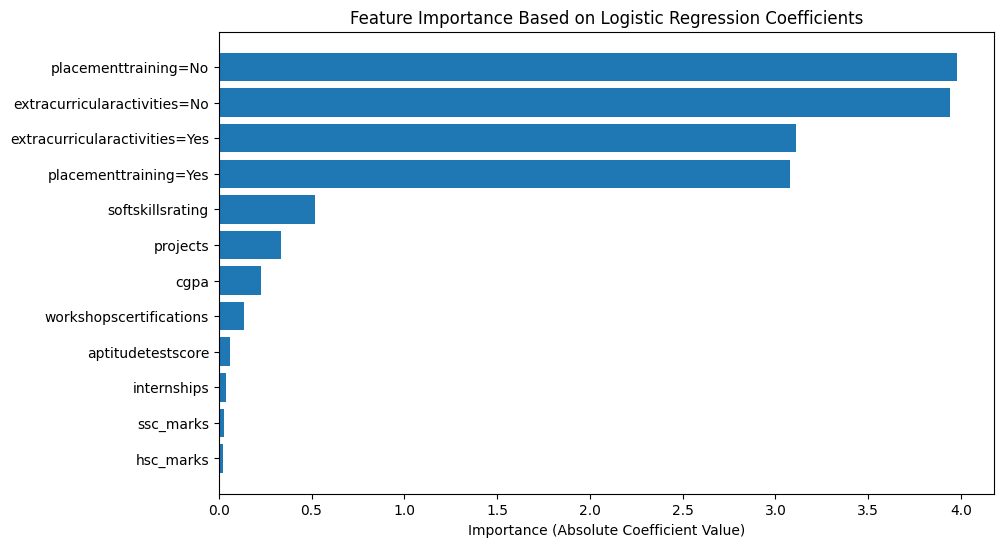

                          Feature  Importance
6            placementtraining=No    3.977206
2    extracurricularactivities=No    3.942883
3   extracurricularactivities=Yes    3.110756
7           placementtraining=Yes    3.076434
9                softskillsrating    0.521301
8                        projects    0.338058
1                            cgpa    0.229933
11        workshopscertifications    0.137685
0               aptitudetestscore    0.059826
5                     internships    0.039816
10                      ssc_marks    0.026294
4                       hsc_marks    0.024118


In [22]:
feature_names = dv.get_feature_names_out()

if len(feature_names) != len(model.coef_[0]):
    print(f"Feature names count: {len(feature_names)}, Coefficients count: {len(model.coef_[0])}")
    raise ValueError("Mismatch between feature names and coefficients count!")

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
})

feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance[['Feature', 'Importance']])

#### Observation 1: The feature importance ranking shows that `placementtraining` and `extracurricularactivities` are the most influential features in your model, followed by `softskillsrating`, `projects`, and `cgpa`.

### 7. Simplifying the Model (Most Important Features)

In [23]:
categorical = ['extracurricularactivities', 'placementtraining']
numerical = ['softskillsrating', 'projects', 'cgpa']

In [24]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
attendance_decision = (y_pred >= 0.5)

accuracy = (y_val == attendance_decision).mean()
recall = recall_score(y_val, attendance_decision)
f1 = f1_score(y_val, attendance_decision)
roc_auc = roc_auc_score(y_val, y_pred)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Validation Accuracy: 0.7790
Recall: 0.7648
F1 Score: 0.7483
ROC AUC: 0.8550


### Interpretation, compared to the baseline model:
- Accuracy dropped slightly (0.787 → 0.779): Removing features might have reduced overall predictive power.
- Recall slightly improved (0.759 → 0.765): The model is catching more placed students, which is a positive if recall is a priority.
- F1 Score dropped slightly (0.754 → 0.748): The balance between precision and recall changed a bit.
- ROC AUC dropped more significantly (0.872 → 0.855): The model's ability to distinguish between classes has decreased.

#### Takeaway: Since distinguishing `placed` vs. `not placed` (ROC AUC) is critical, the full model might be slightly better.

### 8. Training Random Forest for comparison
- Random Forest is an ensemble of decision trees, where each tree is trained on a random subset of the features and data. It can handle non-linear relationships and interactions well.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

rf_model = RandomForestClassifier(random_state=1)

rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)
y_val_pred_rf_proba = rf_model.predict_proba(X_val)[:, 1]

rf_val_accuracy = accuracy_score(y_val, y_val_pred_rf)
rf_val_recall = recall_score(y_val, y_val_pred_rf)
rf_val_f1 = f1_score(y_val, y_val_pred_rf)
rf_val_roc_auc = roc_auc_score(y_val, y_val_pred_rf_proba)

print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.4f}")
print(f"Random Forest Recall: {rf_val_recall:.4f}")
print(f"Random Forest F1 Score: {rf_val_f1:.4f}")
print(f"Random Forest ROC AUC: {rf_val_roc_auc:.4f}")

Random Forest Validation Accuracy: 0.7425
Random Forest Recall: 0.7159
Random Forest F1 Score: 0.7049
Random Forest ROC AUC: 0.8021


### Key Takeaways:
- Logistic Regression outperforms Random Forest in all metrics
  - Higher accuracy (78.7% vs. 74.3%)
  - Higher recall (75.9% vs. 71.6%) → Logistic Regression is better at identifying placed students.
  - Better F1 Score (75.4% vs. 70.5%) → Logistic Regression balances precision and recall better.
  - Significantly higher ROC AUC (87.2% vs. 80.2%) → Logistic Regression is better at distinguishing placed vs. not placed.

### 9. Training  Gradient Boosting Model for comparison
- Gradient Boosting is another ensemble technique that builds trees sequentially. Each tree tries to correct the errors made by the previous one, making it very effective for capturing complex patterns in data.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

gb_model = GradientBoostingClassifier(random_state=1)

gb_model.fit(X_train, y_train)

y_val_pred_gb = gb_model.predict(X_val)
y_val_pred_gb_proba = gb_model.predict_proba(X_val)[:, 1]

gb_val_accuracy = accuracy_score(y_val, y_val_pred_gb)
gb_val_recall = recall_score(y_val, y_val_pred_gb)
gb_val_f1 = f1_score(y_val, y_val_pred_gb)
gb_val_roc_auc = roc_auc_score(y_val, y_val_pred_gb_proba)

print(f"Gradient Boosting Validation Accuracy: {gb_val_accuracy:.4f}")
print(f"Gradient Boosting Recall: {gb_val_recall:.4f}")
print(f"Gradient Boosting F1 Score: {gb_val_f1:.4f}")
print(f"Gradient Boosting ROC AUC: {gb_val_roc_auc:.4f}")

Gradient Boosting Validation Accuracy: 0.7755
Gradient Boosting Recall: 0.7322
Gradient Boosting F1 Score: 0.7370
Gradient Boosting ROC AUC: 0.8510


### Observations:
- Logistic Regression outperforms both Random Forest and Gradient Boosting across all metrics.
- Gradient Boosting is better than Random Forest but still slightly worse than Logistic Regression.
- Random Forest is the weakest performer overall.

### 9a. Tuning the GBM to improve accuracy

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

param_grid = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingClassifier(random_state=1)

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid,
                                   n_iter=10, scoring='accuracy', cv=5, random_state=1, n_jobs=-1, 
                                   refit='accuracy', return_train_score=True)

random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Validation Accuracy: {random_search.best_score_}")

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_val)
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Best Parameters: {'subsample': 0.8, 'n_estimators': np.int64(150), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}
Best Validation Accuracy: 0.79
Recall: 0.6938
F1 Score: 0.7264
ROC AUC: 0.8545


#### Key Takeaways:
- Gradient Boosting did improve with the hyperparameter tuning, but it still doesn’t surpass Logistic Regression in performance.
- Logistic Regression remains the best model when considering accuracy, recall, F1 score, and ROC AUC.

### 9b. Evaluating the Gradient Boosting model on the test set using the best parameters

In [28]:
best_model = GradientBoostingClassifier(
    subsample=0.8, 
    n_estimators=150,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=5,
    learning_rate=0.01,
    random_state=1
)

best_model.fit(X_train, y_train)

test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_pred_test = best_model.predict_proba(X_test)[:, 1]
test_accuracy = (y_test == (y_pred_test >= 0.5)).mean()

print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred_binary = (y_pred_test >= 0.5)

test_recall = recall_score(y_test, y_pred_binary)
test_f1 = f1_score(y_test, y_pred_binary)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Test Accuracy: 0.7830
Test Recall: 0.6869
Test F1 Score: 0.7189
Test ROC AUC: 0.8608


### Interpretation:
- Test Accuracy (0.7830): Still close to Logistic Regression, with only a slight drop.
- Test Recall (0.6869): Lower than Logistic Regression (0.7590), meaning Gradient Boosting is missing more placed students.
- Test F1 Score (0.7189): Lower than Logistic Regression (0.7538), indicating the trade-off between precision and recall is less favorable.
- Test ROC AUC (0.8608): A solid score, though still lower than Logistic Regression (0.8716), meaning Logistic Regression is slightly better at distinguishing placed vs. non-placed students.

#### Takeaways: 
- Gradient Boosting shows good performance, but Logistic Regression still outperforms it across all metrics on both the validation and test sets.
- The difference between the two models is minimal in terms of accuracy but notable in recall and ROC AUC, with Logistic Regression leading.

### 10. Testing Baseline Model on Test set

In [29]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_pred_test = model.predict_proba(X_test)[:, 1]
test_accuracy = (y_test == (y_pred_test >= 0.5)).mean()

test_recall = recall_score(y_test, (y_pred_test >= 0.5))
test_f1 = f1_score(y_test, (y_pred_test >= 0.5))
test_roc_auc = roc_auc_score(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Test Accuracy: 0.7770
Test Recall: 0.7488
Test F1 Score: 0.7307
Test ROC AUC: 0.8572


### Interpretation:
- Test Accuracy (0.7770): Slightly lower than Gradient Boosting (0.7830), but the difference is minimal.
- Test Recall (0.7488): Higher than Gradient Boosting (0.6869). Logistic Regression performs better at identifying placed students.
- Test F1 Score (0.7307): Slightly higher than Gradient Boosting (0.7189), indicating a better balance between precision and recall.
- Test ROC AUC (0.8572): A bit lower than Gradient Boosting (0.8608), but the difference is negligible and within a reasonable range.

### Conclusion: 
- Logistic Regression is the better model overall in terms of recall and F1 score.
- Gradient Boosting is slightly better in terms of ROC AUC, but Logistic Regression still outperforms in terms of practical metrics (e.g., recall and F1 score) for this particular problem.